<h1>Classification</h1>

In [ ]:
pip install numpy pandas xgboost scikit-learn

Note: you may need to restart the kernel to use updated packages.


<h2>Logistic Regression</h2>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('option_train.csv')

In [ ]:
data.head()

,Unnamed: 0,Value,S,K,tau,r,BS
0,1,348.500,1394.46,1050,0.128767,0.0116,Under
1,2,149.375,1432.25,1400,0.679452,0.0113,Under
2,3,294.500,1478.90,1225,0.443836,0.0112,Under
3,4,3.375,1369.89,1500,0.117808,0.0119,Over
4,5,84.000,1366.42,1350,0.298630,0.0119,Under


In [ ]:
count_over = 0
for x in data['BS']:
    if x == 'Over':
        count_over += 1

count_over/data.shape[0]

0.2264

In [ ]:
test_data.head()

,Unnamed: 0,S,K,tau,r
0,1,1409.28,1325,0.126027,0.0115
1,2,1505.97,1100,0.315068,0.0110
2,3,1409.57,1450,0.197260,0.0116
3,4,1407.81,1250,0.101370,0.0116
4,5,1494.50,1300,0.194521,0.0110


In [ ]:
data.isnull().sum()

Unnamed: 0    0
Value         0
S             0
K             0
tau           0
r             0
BS            0
dtype: int64

In [ ]:
data['BS'] = np.where(data['BS'] == 'Over', 1, 0)

In [ ]:
data.head()

,Unnamed: 0,Value,S,K,tau,r,BS
0,1,348.500,1394.46,1050,0.128767,0.0116,0
1,2,149.375,1432.25,1400,0.679452,0.0113,0
2,3,294.500,1478.90,1225,0.443836,0.0112,0
3,4,3.375,1369.89,1500,0.117808,0.0119,1
4,5,84.000,1366.42,1350,0.298630,0.0119,0


In [ ]:
X = data[['S','K','tau','r']]

In [ ]:
y = data['BS']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
scaler=StandardScaler()

In [ ]:
scaled_X_train= scaler.fit_transform(X_train)

In [ ]:
scaled_X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y_pred_log=log_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test,y_pred_log)

0.89

In [ ]:
#error
1-accuracy_score(y_test,y_pred_log)

0.10999999999999999

In [ ]:
confusion_matrix(y_test,y_pred_log)

array([[1109,   65],
       [ 100,  226]])

In [ ]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1174
           1       0.78      0.69      0.73       326

    accuracy                           0.89      1500
   macro avg       0.85      0.82      0.83      1500
weighted avg       0.89      0.89      0.89      1500



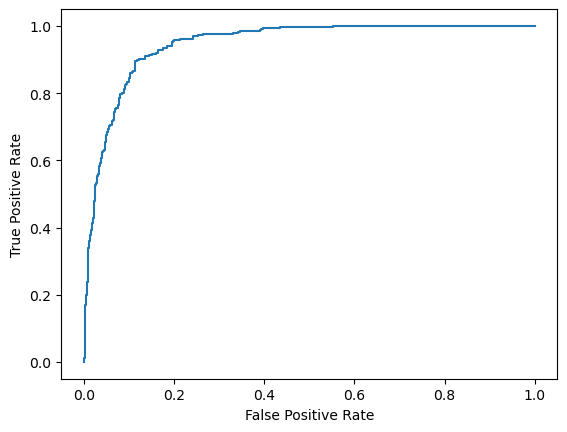

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming log_model is your trained logistic regression model
# and scaled_X_test and y_test are your test data and labels respectively

# Get the prediction scores
y_score = log_model.predict_proba(scaled_X_test)[:, 1]

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Create ROC Display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

plt.show()


<h2>KNN - Classification</h2>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y_pred_knn=knn_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test,y_pred_knn)

0.91

In [ ]:
#error
1-accuracy_score(y_test,y_pred_knn)

0.08999999999999997

In [ ]:
confusion_matrix(y_test,y_pred_knn)

array([[1094,   80],
       [  55,  271]])

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1174
           1       0.77      0.83      0.80       326

    accuracy                           0.91      1500
   macro avg       0.86      0.88      0.87      1500
weighted avg       0.91      0.91      0.91      1500



In [ ]:
len(y_test)

1500

In [ ]:
#which K number can minimize this error

In [ ]:
test_error_rates=[]

for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error=1-accuracy_score(y_test, y_pred_test)

    test_error_rates.append(test_error)

Text(0.5, 0, 'K NEIGHBORS')

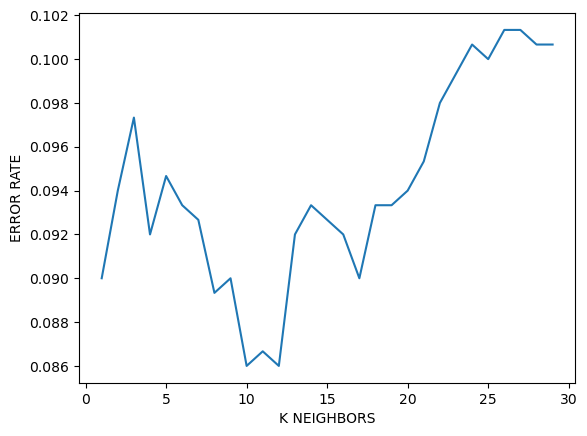

In [ ]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K NEIGHBORS')

<h3>CV for KNN</h3>

The optimal number of neighbors is 1


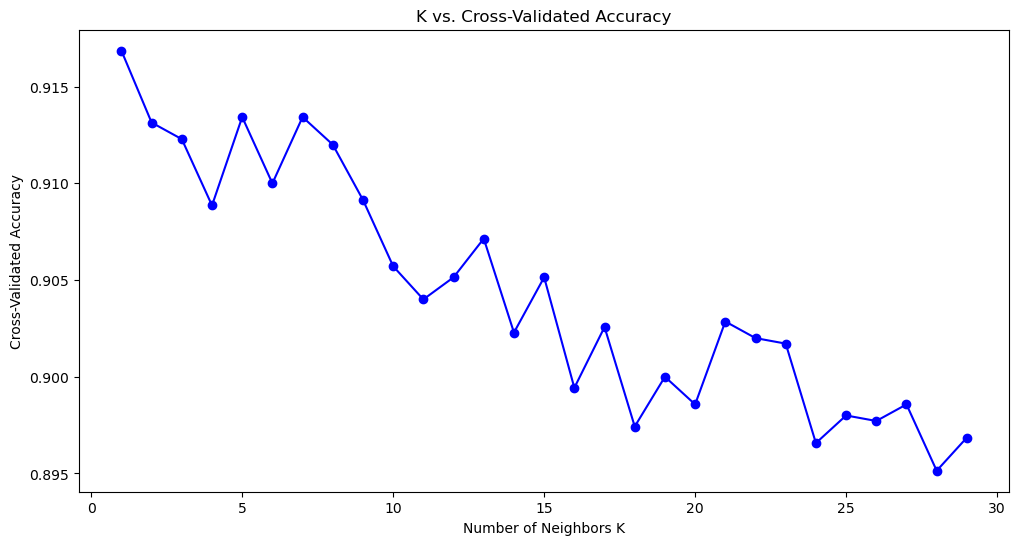

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# List to keep track of average cross-validation scores
cv_scores = []

# Define a range of n_neighbors you want to try
neighbors_range = range(1, 30)

for n_neighbors in neighbors_range:
    # Initialize the KNN classifier
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Perform cross-validation
    scores = cross_val_score(knn_model, scaled_X_train, y_train, cv=10, scoring='accuracy')

    # Append the mean of the scores for this n_neighbors to cv_scores
    cv_scores.append(scores.mean())

# Find the optimal n_neighbors with the highest mean accuracy
optimal_n = neighbors_range[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_n}")

# Plot the relationship between n_neighbors and cross-validation score
plt.figure(figsize=(12,6))
plt.plot(neighbors_range, cv_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K vs. Cross-Validated Accuracy')

plt.show()


<h2>Decision Tree - Classification </h2>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier()

In [ ]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_tree = tree_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.91


In [ ]:
#error
1-accuracy_score(y_test,y_pred_tree)

0.08666666666666667

In [ ]:
confusion_matrix(y_test,y_pred_tree)

array([[1095,   79],
       [  51,  275]])

In [ ]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1174
           1       0.78      0.84      0.81       326

    accuracy                           0.91      1500
   macro avg       0.87      0.89      0.88      1500
weighted avg       0.92      0.91      0.91      1500



In [ ]:
from sklearn.tree import plot_tree

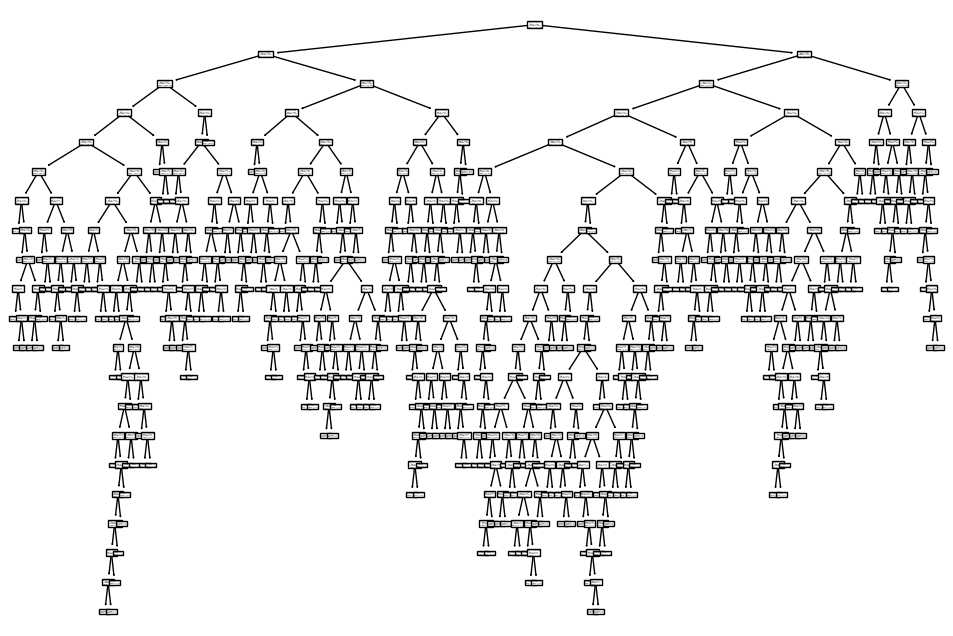

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(tree_model);

<h3>CV for Decision Tree</h3>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

param_grid = {'max_depth': range(1, 20)}
tree_model = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best cross-validation accuracy: {best_score:.2f}')

# best 'max_depth' to train your final model
tree_model_best = DecisionTreeClassifier(max_depth=best_params['max_depth'])
tree_model_best.fit(X_train, y_train)

# Evaluate the model with the best 'max_depth'
y_pred_tree_best = tree_model_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_tree_best)
print(f'Accuracy with best –––max_depth: {accuracy_best:.2f}')


Best parameters: {'max_depth': 17}
Best cross-validation accuracy: 0.90
Accuracy with best –––max_depth: 0.92


In [ ]:
y_train

2654    0
2468    0
290     0
1463    0
4508    0
       ..
4171    1
599     1
1361    0
1547    1
4959    1
Name: BS, Length: 3500, dtype: int64

<h2>Random Forest - Classification </h2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=10,random_state=101)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [ ]:
y_pred_rfc=rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rfc)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


In [ ]:
#error
1-accuracy_score(y_test,y_pred_rfc)

0.07799999999999996

In [ ]:
confusion_matrix(y_test,y_pred_rfc)

array([[1120,   54],
       [  63,  263]])

In [ ]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1174
           1       0.83      0.81      0.82       326

    accuracy                           0.92      1500
   macro avg       0.89      0.88      0.88      1500
weighted avg       0.92      0.92      0.92      1500



<h3>CV for Random Forest</h3>

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
}

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best cross-validation accuracy: {best_score:.2f}')


Best parameters: {'n_estimators': 200}
Best cross-validation accuracy: 0.92


<h2>Gradient Boosting</h2>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf=GradientBoostingClassifier(random_state=101)

In [ ]:
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier(random_state=101)

In [ ]:
y_pred_gb=gb_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_gb=accuracy_score(y_test,y_pred_gb)

In [ ]:
print(f'Accuracy for Gradient Boosting Classifier: {accuracy_gb}')

Accuracy for Gradient Boosting Classifier: 0.9066666666666666


In [ ]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1174
           1       0.79      0.78      0.78       326

    accuracy                           0.91      1500
   macro avg       0.86      0.86      0.86      1500
weighted avg       0.91      0.91      0.91      1500



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [ ]:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=101), param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred_best_gb = best_model.predict(X_test)

In [ ]:
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
print(f'Best Accuracy for Gradient Boosting Classifier: {accuracy_best_gb}')

Best Accuracy for Gradient Boosting Classifier: 0.9326666666666666


In [ ]:
1-accuracy_best_gb

0.06733333333333336

In [ ]:
confusion_matrix(y_test,y_pred_best_gb)

array([[1125,   49],
       [  52,  274]])

In [ ]:
print(classification_report(y_test, y_pred_best_gb))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1174
           1       0.85      0.84      0.84       326

    accuracy                           0.93      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.93      0.93      0.93      1500



<h2>XGBoost Classifier</h2>

In [ ]:
from xgboost import XGBClassifier

xg_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xg_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test data
y_pred_xg = xg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xg)
report = classification_report(y_test, y_pred_xg)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9306666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1174
           1       0.84      0.84      0.84       326

    accuracy                           0.93      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.93      0.93      0.93      1500



In [ ]:
y_test

1718    1
2511    0
345     0
2521    0
54      1
       ..
3412    0
4020    0
4635    0
1700    1
790     1
Name: BS, Length: 1500, dtype: int64

In [ ]:
print(y_train.value_counts())

0    2694
1     806
Name: BS, dtype: int64


In [ ]:
prediction_over=0
for x in y_train:
    if x == 1:
        prediction_over+=1
prediction_over

806

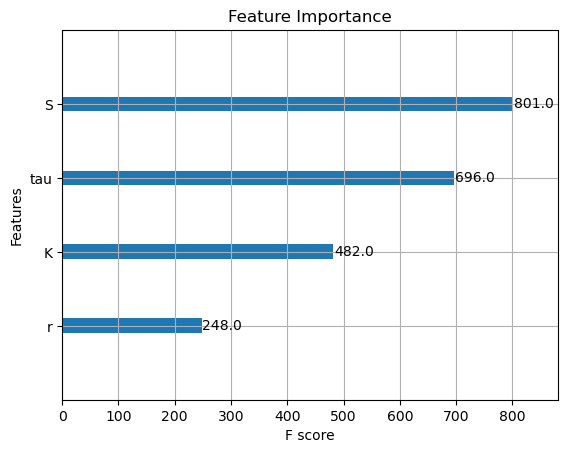

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(xg_model)
plt.title('Feature Importance')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200}
Best score: 0.932


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred_best_xgboost = best_model.predict(X_test)

In [ ]:
Classification_Error = 1-grid_search.best_score_
print(Classification_Error)

0.06799999999999995


In [ ]:
confusion_matrix(y_test,y_pred_best_xgboost)

array([[1118,   56],
       [  47,  279]])

In [ ]:
print(classification_report(y_test, y_pred_best_xgboost))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1174
           1       0.83      0.86      0.84       326

    accuracy                           0.93      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.93      0.93      0.93      1500

